In [1]:
import pandas as pd
import numpy as np

In [23]:
marks = pd.DataFrame([(101,'Java',60),(102,'Java',80),(102,'Python',76), (104,'Oracle',88)])

In [24]:
marks

,0,1,2
0,101,Java,60
1,102,Java,80
2,102,Python,76
3,104,Oracle,88


In [25]:
marks = pd.DataFrame([(101,'Java',60),(102,'Java',80),(102,'Python',76), (104,'Oracle',88)],
                    columns=['Rollno','Subject','Marks'])

In [26]:
marks

,Rollno,Subject,Marks
0,101,Java,60
1,102,Java,80
2,102,Python,76
3,104,Oracle,88


In [6]:
marks.columns

Index(['Rollno', 'Subject', 'Marks'], dtype='object')

In [7]:
marks.index

RangeIndex(start=0, stop=4, step=1)

#### adding and deleting rows 

In [10]:
marks.append( [{'Rollno' : 103,'Subject' :'Java', 'Marks' : 80},
               {'Rollno' : 103,'Subject' :'Python', 'Marks' : 87}]
               , ignore_index=True)               

,Rollno,Subject,Marks
0,101,Java,60
1,102,Java,80
2,102,Python,76
3,104,Oracle,88
4,103,Java,80
5,103,Python,87


In [18]:
newmarks = pd.DataFrame([{'Rollno' : 103,'Subject' :'Java', 'Marks' : 80},
               {'Rollno' : 103,'Subject' :'Python', 'Marks' : 87}])

In [19]:
newmarks

,Marks,Rollno,Subject
0,80,103,Java
1,87,103,Python


In [14]:
marks.append(newmarks, ignore_index=True)

e:\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Marks,Rollno,Subject
0,60,101,Java
1,80,102,Java
2,76,102,Python
3,88,104,Oracle
4,80,103,Java
5,87,103,Python


In [20]:
newmarks.loc[0] = [88,101,'C#']

In [21]:
newmarks

,Marks,Rollno,Subject
0,88,101,C#
1,87,103,Python


### Adding and delting columns

In [27]:
marks['PassMark'] = 50

In [33]:
marks['Result'] = marks['Marks'] >= marks['PassMark']

In [36]:
marks

,Rollno,Subject,Marks,PassMark,Result
0,101,Java,60,50,True
1,102,Java,80,50,True
2,102,Python,76,50,True
3,104,Oracle,88,50,True


In [35]:
marks.drop(['Result'], axis=1)

,Rollno,Subject,Marks,PassMark
0,101,Java,60,50
1,102,Java,80,50
2,102,Python,76,50
3,104,Oracle,88,50


### Concatenate, merge etc.

In [41]:
df1 = pd.DataFrame( [('A',10),('B',20),('C',15)], columns = ['Name','Age'])

In [43]:
df2 = pd.DataFrame( [('D',10),('E',20)], columns = ['Name','Exp'])

In [46]:
ndf = pd.concat([df1,df2])

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [60]:
ndf.reset_index(drop=True)

,Age,Exp,Name
0,10.0,NaN,A
1,20.0,NaN,B
2,15.0,NaN,C
3,NaN,10.0,D
4,NaN,20.0,E


In [59]:
ndf

,Age,Exp,Name
0,10.0,NaN,A
1,20.0,NaN,B
2,15.0,NaN,C
0,NaN,10.0,D
1,NaN,20.0,E


### Dummies

In [61]:
marks = pd.DataFrame([{'Rollno' : 103,'Subject' :'Java', 'Marks' : 80},
               {'Rollno' : 103,'Subject' :'Python', 'Marks' : 87}])

In [62]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
Marks      2 non-null int64
Rollno     2 non-null int64
Subject    2 non-null object
dtypes: int64(2), object(1)
memory usage: 128.0+ bytes


In [63]:
pd.get_dummies(marks)

,Marks,Rollno,Subject_Java,Subject_Python
0,80,103,1,0
1,87,103,0,1


In [69]:
pd.cut(marks['Marks'],bins=[50,65,80,100], precision=0, labels=['Poor','Avg','High'])

0     Avg
1    High
Name: Marks, dtype: category
Categories (3, object): [Poor < Avg < High]

### Sales

In [2]:
sales = pd.read_csv('sales.txt')

In [3]:
sales

,Month,Book,City,Units
0,JAN,B100,VZG,10.0
1,JAN,B300,VZG,20.0
2,FEB,B100,VZG,4.0
3,MAR,B100,VZG,13.0
4,JAN,B100,HYD,30.0
5,FEB,B100,HYD,40.0
6,MAR,B100,HYD,10.0
7,JAN,B200,VZG,14.0
8,FEB,B200,HYD,NaN
9,MAR,B200,NaN,4.0


In [6]:
sales.shape

(10, 4)

In [7]:
sales.axes

[RangeIndex(start=0, stop=10, step=1),
 Index(['Month', 'Book', 'City', 'Units'], dtype='object')]

In [8]:
sales.columns = ['Mon','Book','City','Qty']

In [11]:
sales.dtypes

Mon      object
Book     object
City     object
Qty     float64
dtype: object

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Mon     10 non-null object
Book    10 non-null object
City    9 non-null object
Qty     9 non-null float64
dtypes: float64(1), object(3)
memory usage: 400.0+ bytes


In [14]:
sales.describe(include='all')

,Mon,Book,City,Qty
count,10,10,9,9.000000
unique,3,3,2,NaN
top,JAN,B100,VZG,NaN
freq,4,6,5,NaN
mean,NaN,NaN,NaN,16.111111
std,NaN,NaN,NaN,12.046207
min,NaN,NaN,NaN,4.000000
25%,NaN,NaN,NaN,10.000000
50%,NaN,NaN,NaN,13.000000
75%,NaN,NaN,NaN,20.000000


In [18]:
sales['City'].unique()

array(['VZG', 'HYD', nan], dtype=object)

In [26]:
cities = sales['City'].values
type(cities)

numpy.ndarray

In [40]:
sales.loc[ sales['Book'] == 'B100',['City','Qty']]

,City,Qty
0,VZG,10.0
2,VZG,4.0
3,VZG,13.0
4,HYD,30.0
5,HYD,40.0
6,HYD,10.0


In [35]:
sales['Book'] == 'B100' 

0     True
1    False
2     True
3     True
4     True
5     True
6     True
7    False
8    False
9    False
Name: Book, dtype: bool

In [45]:
sales.iloc[2:4,2:4]

,City,Qty
2,VZG,4.0
3,VZG,13.0


In [46]:
sales

,Mon,Book,City,Qty
0,JAN,B100,VZG,10.0
1,JAN,B300,VZG,20.0
2,FEB,B100,VZG,4.0
3,MAR,B100,VZG,13.0
4,JAN,B100,HYD,30.0
5,FEB,B100,HYD,40.0
6,MAR,B100,HYD,10.0
7,JAN,B200,VZG,14.0
8,FEB,B200,HYD,NaN
9,MAR,B200,NaN,4.0


#### at and iat

In [5]:
sales.at[0,'Month']

'JAN'

In [6]:
sales.iat[0,0]

'JAN'

In [12]:
sales.loc[sales.Month.isin(['JAN']), ['City','Units']]

,City,Units
0,VZG,10.0
1,VZG,20.0
4,HYD,30.0
7,VZG,14.0


In [14]:
sales.where( sales['Units'] > 5 )

,Month,Book,City,Units
0,JAN,B100,VZG,10.0
1,JAN,B300,VZG,20.0
2,NaN,NaN,NaN,NaN
3,MAR,B100,VZG,13.0
4,JAN,B100,HYD,30.0
5,FEB,B100,HYD,40.0
6,MAR,B100,HYD,10.0
7,JAN,B200,VZG,14.0
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [15]:
sales.where( sales['Units'] > 5, 0 )

,Month,Book,City,Units
0,JAN,B100,VZG,10.0
1,JAN,B300,VZG,20.0
2,0,0,0,0.0
3,MAR,B100,VZG,13.0
4,JAN,B100,HYD,30.0
5,FEB,B100,HYD,40.0
6,MAR,B100,HYD,10.0
7,JAN,B200,VZG,14.0
8,0,0,0,0.0
9,0,0,0,0.0


In [19]:
sales.sample(n = 3)

,Month,Book,City,Units
7,JAN,B200,VZG,14.0
6,MAR,B100,HYD,10.0
0,JAN,B100,VZG,10.0


### Grouping 

In [6]:
sales.groupby('Month').sum()

,Units
Month,
FEB,44.0
JAN,74.0
MAR,27.0


### Missing values 

In [19]:
sales.isna().any(axis=1)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9     True
dtype: bool

In [23]:
sales.dropna(axis=1)

,Month,Book
0,JAN,B100
1,JAN,B300
2,FEB,B100
3,MAR,B100
4,JAN,B100
5,FEB,B100
6,MAR,B100
7,JAN,B200
8,FEB,B200
9,MAR,B200


In [24]:
sales.loc[sales.isna().any(axis=1), sales.isna ().any(axis=0)]

,City,Units
8,HYD,NaN
9,NaN,4.0


In [25]:
sales.isna ().any(axis=0)

Month    False
Book     False
City      True
Units     True
dtype: bool

In [26]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Month    10 non-null object
Book     10 non-null object
City     9 non-null object
Units    9 non-null float64
dtypes: float64(1), object(3)
memory usage: 400.0+ bytes


In [28]:
sales['Qty'] =  sales['Units'].fillna(0).astype('int')

In [29]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
Month    10 non-null object
Book     10 non-null object
City     9 non-null object
Units    9 non-null float64
Qty      10 non-null int32
dtypes: float64(1), int32(1), object(3)
memory usage: 440.0+ bytes


In [33]:
sales.drop(['Units'], axis=1, inplace=True)

In [38]:
sales.to_csv('newsales.csv', index=False)

### Pivot table

In [9]:
sales.pivot_table(index=['Month','City'],columns='Book', aggfunc=['sum','count'])

sum             count          
           Units             Units          
Book        B100  B200  B300  B100 B200 B300
Month City                                  
FEB   HYD   40.0   0.0   NaN   1.0  0.0  NaN
      VZG    4.0   NaN   NaN   1.0  NaN  NaN
JAN   HYD   30.0   NaN   NaN   1.0  NaN  NaN
      VZG   10.0  14.0  20.0   1.0  1.0  1.0
MAR   HYD   10.0   NaN   NaN   1.0  NaN  NaN
      VZG   13.0   NaN   NaN   1.0  NaN  NaN

### plot()

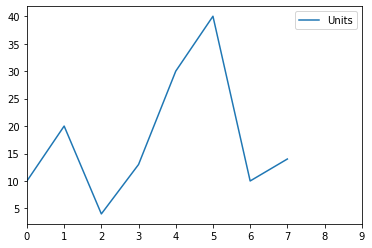

In [12]:
sales.plot(kind='line')

In [11]:
%matplotlib inline

In [14]:
totalsales = sales.groupby('Book').agg('sum')

In [15]:
totalsales

,Units
Book,
B100,107.0
B200,18.0
B300,20.0


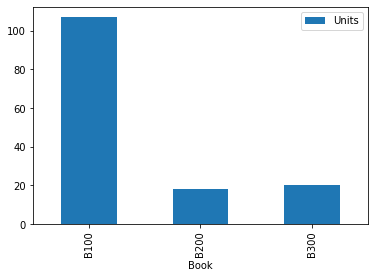

In [17]:
totalsales.plot(kind='bar')

NameError: name 'countries' is not defined